In [39]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Exercise 6.1

$C_{100}^5=75,287,520$

In [2]:
from scipy.special import comb
print(comb(100,5))

75287520.0


# Exercise 6.2

$XX^T = C$, $X$ is central mean

$AX(AX)^T = AXX^TA^T = ACA^T$

Hints: $(AB)^T = B^TA^T$

# Exercise 6.7

#### a)
#### The 1D subspace is given by any line orthogonal to this initial line going through the two points.

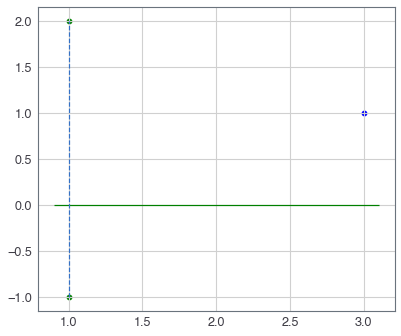

In [7]:
a = np.array([[1,-1], [1,2]])
b = np.array([3,1])
plt.scatter(a[:,0], a[:,1], c="green")
plt.scatter(b[0], b[1], c="blue")
plt.plot(a[:,0], a[:,1], linestyle="dashed")
plt.hlines(0, 0.9, 3.1,colors="green")
plt.show()

#### b)

#### Take a line perpendicular to the plane through the three points from the same class.

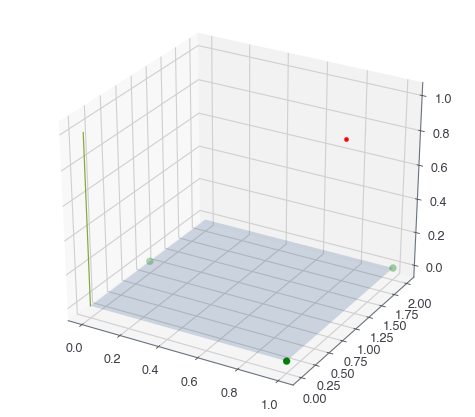

In [11]:
a = np.array([[1,0,0], [0,1,0], [1,2,0]])
b = np.array([1,1,1])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a[:,0], a[:,1], a[:,2], c="green", s=50)
ax.scatter(b[0], b[1], b[2], c="red")
X, Y = np.meshgrid(a[:,0], a[:,1])
Z = np.array([a[:,2]])
ax.plot_surface(X, Y, Z, alpha=0.1)
ax.plot(np.array([0,0]),np.array([0,0]),np.array([0,1])) # the target line
plt.show()

# PCA Example
The example is from the trial exam.

In [12]:
C = np.array([[1,0,0],[0,2,0],[0,0,4]])

# Calculate the eigenvector and eigenvalue

value,vector = np.linalg.eig(C)
print("eigenValue: ", value)
print("eigenVector: \n ", vector)

eigenValue:  [1. 2. 4.]
eigenVector: 
  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Therefore, the first principal component is $[0, 0, 1]^T$. The direction is the third dimension.

In [14]:
T = np.array([[1, 0, 0], [0, 0.5, -np.sqrt(3)/2], [0, np.sqrt(3)/2, 0.5]])
C_trans = T.dot(C).dot(T.T) # Exercise 6.2 linear transformation ACA^T
print(C_trans)

[[ 1.         0.         0.       ]
 [ 0.         3.5       -0.8660254]
 [ 0.        -0.8660254  2.5      ]]


In [16]:
# Calculate the eigenvector and eigenvalue

value_trans, vector_trans = np.linalg.eig(C_trans)

print("New eigenValue: ", value_trans)
print("New eigenVector: \n ", vector_trans)

New eigenValue:  [2. 4. 1.]
New eigenVector: 
  [[ 0.         0.         1.       ]
 [-0.5       -0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]]


The answer is $[0, -0.8660254, 0.5]^T$ regardless of the direction.

# Exercise 6.13
### study dimensionality reductions for this classiﬁcation problem

a) PCA direction: $[1,0,0]$

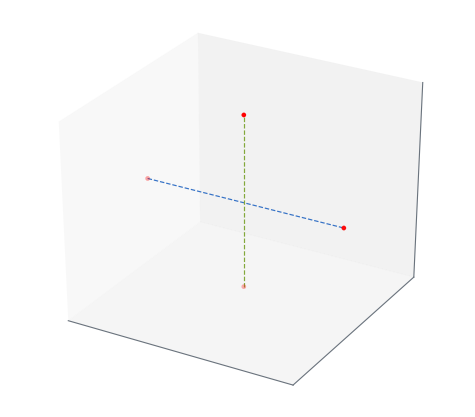

In [18]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0], [0,0], linestyle="dashed")
plt.plot([0,0], [0,0], [-3,3], linestyle="dashed")
plt.show()

### b) Because the within scatter is spherical, one should be able to see that the answer will the same as in item a.
**$[1,0,0]$**

### c)
**2D PCA** will not change, it will still be xz plane.\
The second coordinate is of least importance in PCA and that for Fisher there is no within-scatter in that same second dimension.

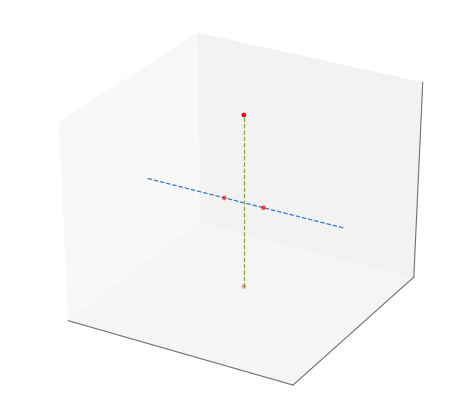

In [19]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
mean[:,0] = mean[:,0]/4
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0], [0,0], linestyle="dashed")
plt.plot([0,0], [0,0], [-3,3], linestyle="dashed")
plt.show()

d) The answer for Fisher should be easy as it is **scaling invariant**, given enough samples. PCA however is **not scale invariant** and the scaling is just enough to make the ﬁrst coordinate the least varying on. The new subspace will be equal to the second and third feature.

e)\
**PCA**: Perform dimensionality reduction while preserving as much of the **variance** in the high dimensional space as possible.
**LDA**: Perform dimensionality reduction while preserving as much of the **class discriminatory information** as possible.
The within scatter will be rather **unstable** & the second dimension does not contain any discriminatory information $\to$ Fisher LDA will not be the best.

Therefore, PCA will therefore be better in general.

Conclusion: PCA can work for **both small and large dataset**, while LDA is **limited for the small dataset**.

# Exercise 6.19

maha-s: the sum of Mahalanobis distances

Mahalanobis distances are the same as the **Euclidean distance**, but they have a **correction based on some covariance**. Specifically for this exercise, the Mahalanobis distance between two classes based on the two class mean m1 and m2 is given by $(m_1-m_2)S_W^{-1}(m_1-m_2)$

In [24]:
# help(pr.featself) -- feature forward selection
# help(pr.featselb) -- feature backward selection
help(pr.featseli) # -- Individual Feature Selector

Help on function featseli in module prtools.prtools:

featseli(task=None, x=None, w=None)
    Individual Feature Selector
    
           w = featseli(A, (K,CRIT))
    
    Individual feature selection of K features using the dataset A. The
    criterion is defined by CRIT; for more information for possible
    criteria, see FEATEVAL.
    
    Example:
    a = gendat()
    w = featseli(a, (4,ldc()))



a)

In [26]:
data = pr.gendatd(100,10)
print((+data)[1])

[-13.48938392  -9.15506829  -3.26576319  -6.81851059   5.71943977
  -2.90790571   4.25845297  -5.41171394  -1.00767919  -4.64565521]


In [27]:
wF = pr.featself(data, (2, 'maha-s'))
wB = pr.featselb(data, (2, 'maha-s'))
wI = pr.featseli(data, (2, 'maha-s'))
dataF = wF(data)
dataB = wB(data)
dataI = wI(data)

In [28]:
print((+dataF)[1], ': feature 0 and 1', '\n')
print((+dataB)[1], ': feature 8 and 9', '\n') # backward
print((+dataI)[1], ': feature 0 and 1', '\n')

[-13.48938392  -9.15506829] : feature 0 and 1 

[-1.00767919 -4.64565521] : feature 8 and 9 

[-13.48938392  -9.15506829] : feature 0 and 1 



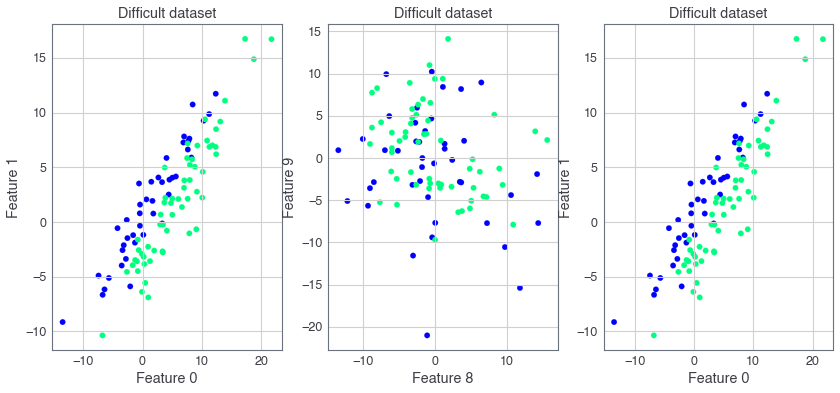

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(131)
pr.scatterd(dataF)
plt.subplot(132)
pr.scatterd(dataB)
plt.subplot(133)
pr.scatterd(dataI)

b)\
**featself** and **featseli** both select the optimal one, while **featselb** does not.

# Exercise 6.20

a)

In [40]:
data = pr.read_mat("diabetes")
print("data shape: ", data.shape)

data shape:  (768, 8)


In [42]:
help (np.unique)

Help on function unique in module numpy:

unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements:
    
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array
    
    Parameters
    ----------
    ar : array_like
        Input array. Unless `axis` is specified, this will be flattened if it
        is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` (along the specified axis,
        if provided, or in the flattened array) that result in the unique array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array (for the specified
        axis, if pro

In [48]:
help (pr.dataset)

Help on module prtools.dataset in prtools:

NAME
    prtools.dataset - Pattern Recognition Dataset class

DESCRIPTION
    Should provide a simple and consistent way to deal with datasets.
    A dataset contains:
        data     a data matrix of NxD,  where N is the number of objects,
                 and D is the number of features
        targets  the output values that should be predicted from the objects
    Additionally, a dataset name, or feature labels can be provided.
    
    The main goal is to keep the labels consistent with the data, when you
    try to slice your dataset, or when you want to split your data in a
    training and test set:
        a = gendatb([50,50])     generate a Banana prdataset
        [x,z] = gendat(a,0.8)    split in train and test set
        b = a[:,:1]              only select the first feature
        c = a[30:50,:]           only select a few samples

CLASSES
    builtins.object
        prdataset
    
    class prdataset(builtins.object)
     | 

In [41]:
print("Class: ", np.unique(data.nlab(), return_counts=True))

Class:  (array([0, 1]), array([500, 268]))


In [50]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(+data, data.nlab(), test_size=0.5, random_state=20)

In [64]:
# PRtools
#train = pr.prdataset(x_train, targets = y_train)
#test = pr.prdataset(x_test, targets = y_test)
#print("training data shape: ", train.shape)
#print("testing data shape: ", test.shape)
#w = pr.fisherc(train)
#e = pr.testc(w.eval(train))

In [65]:
help (pr.fisherc)

Help on function fisherc in module prtools.prtools:

fisherc(task=None, x=None, w=None)
    Fisher's Least Square Linear Discriminant
    
          W = fisherc(A)
    
    Finds the linear discriminant function between the classes in the 
    dataset A by minimizing the errors in the least square sense.



In [66]:
from itertools import combinations

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [67]:
c = list(combinations([0,1,2,3,4,5,6,7], 5))
print(c[:5])

[(0, 1, 2, 3, 4), (0, 1, 2, 3, 5), (0, 1, 2, 3, 6), (0, 1, 2, 3, 7), (0, 1, 2, 4, 5)]


In [77]:
w = LinearDiscriminantAnalysis()
max_acc = 0
for i in range(comb(8,5).astype(np.int)):
    w.fit(x_train[:,list(c[i])], y_train)
    acc = accuracy_score(y_test, w.predict(x_test[:,list(c[i])]))
    if acc > max_acc:
        max_acc = acc
        best_feat = c[i]

In [78]:
print("The best 5 features: ", best_feat)
print("The accuracy is ", max_acc)

The best 5 features:  (0, 1, 2, 5, 6)
The accuracy is  0.7838541666666666


#### b)
#### The optimal 5-dimensional space for a 1NN classiﬁer are also (1,2,3,5,6)

c)
#### The error attained on the test set for these classiﬁers with their respective optimal feature spaces is 1-max_acc = 0.217


In [79]:
pr.feateval(data,pr.ldc())

0.21614583333333334

e)\
Change the value of random_state, you may obtain a **different result**.

# Exercise 6.25

Bagging: the idea of combining classifier outcomes

装袋算法是并行式集成学习的代表，其原理也比较简单。算法步骤如下：

数据处理：将数据根据实际情况进行清洗整理\
随机采样：重复 T 次，每一次从样本中随机选出 T 个子样本。\
个体训练：将每一个子样本放入个体学习器训练。\
分类决策：用投票法集成进行分类决策。

In [82]:
help (pr.baggingc)

Help on function baggingc in module prtools.prtools:

baggingc(task=None, x=None, w=None)
    Bagging



Error rate:  0.35


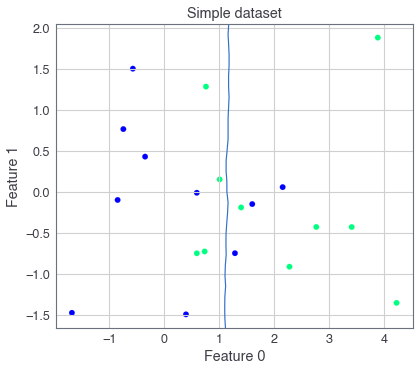

In [87]:
data = pr.gendats((10,10))
w = pr.baggingc(task=data, w=pr.knnc([],1))
print("Error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

Error rate:  0.25


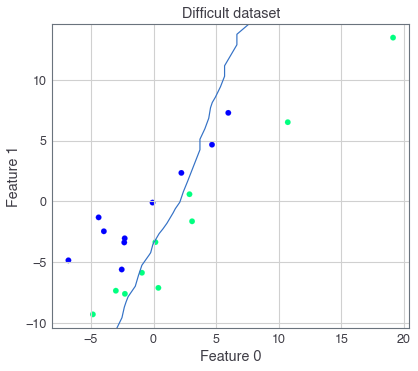

In [88]:
data = pr.gendatd((10,10))
w = pr.baggingc(task=data, w=pr.knnc([],1))
print("Error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

Using gendatd instead of gendats is not necessary for improvement.

# Exercise 6.29 Adaboost

AdaBoost 算法与 Boosting 算法不同的是，其不需要预先知道弱分类器的误差，并且最后得到的强分类器的分类精度依赖于所有弱分类器的分类精度。

Adaboost 算法流程：

1. 数据准备：通过数据清理和数据整理的方式得到符合规范的数据。\
2. 初始化权重：如果有 N 个训练样本数据，在最开始时每一个数据被赋予相同的权值：1/N。\
3. 弱分类器预测：将有权重的训练样本放入弱分类器进行分类预测。\
4. 更改权重：**如果某个样本点被准确地分类，降低其权值；若被分类错误，那么提高其权值。** 然后，权值更新过的样本集被用于训练下一个分类器。\
5. 强分类器组合：重复 3，4 步骤，直至训练结束，加大分类误差率小的弱分类器的权重（这里的权重和样本权重不一样），使其在最终的分类函数中起着较大的决定作用，降低分类误差率大的弱分类器的权重，使其在最终的分类函数中起着较小的决定作用，最终输出结果。\
A decision stump is a machine learning model consisting of a one-level decision tree.[1]

In [147]:
help (pr.stumpc)

Help on function stumpc in module prtools.prtools:

stumpc(task=None, x=None, w=None)
    Decision stump classifier



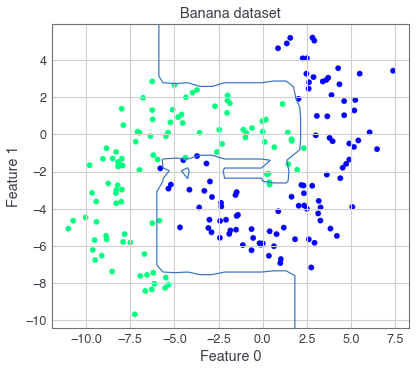

In [152]:
data = pr.gendatb((100,100))
pr.scatterd(data)
w = pr.adaboostc(task=data, w=(pr.stumpc,1000,[],0))
pr.plotc(w)

a) We see the decision boundary become progressively more complex with the increase of base decision stumps.

b) When combining 1000 base decision stumps, the decision boundary (once in a while) becomes overly complex and starts to ﬁt to insigniﬁcant details in the training data. The test error would slowly go up again with more base classiﬁers after initially decreasing.